# Small World, Power Law, and Small World Power Law Networks

Braedyn Au 30016631

    A. Barbasi and R. Albert, "Emergence of scaling in random networks", Science, 286, 1999.
    D. Watts and S. Strogatz, "Collective dynamics of 'small-world' networks", Nature, 393, 1998.
    P. Holme and B. J. Kim, “Growing scale-free networks with tunable clustering”, Phys. Rev. E, 65, 026107, 2002.
    
Networks (graphs) can be used to model systems in many branches of science such as the world wide web, social networks, neural networks, etc. Networks are collections of nodes connected by edges which describe a relation between nodes. The topology of the network reveals crucial information about the system. Two fundamental network types include small-world and power law (scale free) networks, notably described by the models of Watts and Strogatz (WS) and Barabasi and Albert (BA), respectively. A third model created by Holme and Kim (HK) combines these two models for a power law network with tunable clustering as seen in small-world networks.

These 3 models are well implemented in the Python package Networkx. Self written algorithms will be compared and optimized to match accuracy and computation speed to the best of my ability.

# Watts and Strogatz (Small-world network)

Small world networks follow from the small world phenomena in social networks, where strangers may unknowingly be connected through a short chain of mutual acquentences. Mathematically, this is described by the distance $L$ between any two random nodes grows proportionally to the logarithm of the number of nodes $N$.

$$ L \propto logN $$

This relationship is an important method in determining whether my self written algorithm matches the definition of small world network. This function also leads to the six degrees of seperation idea, where everyone in the world is on average within 6 degrees of seperation. 

The most popular method of creating small world networks is with the Watts-Strogatz Model.

    1. Start with a ring of n vertices, each connected to its k nearest neighbours.
    2. Going clockwise around the ring, choose a vertex and its nearest neighbour connection.
    3. Probability p that this connection will rewire to a random non neighbour node. 
    4. Continue for second, third, ..., kth nearest neighbour until every edge has been considered once.

Parameters $n, k, p$ described above. 

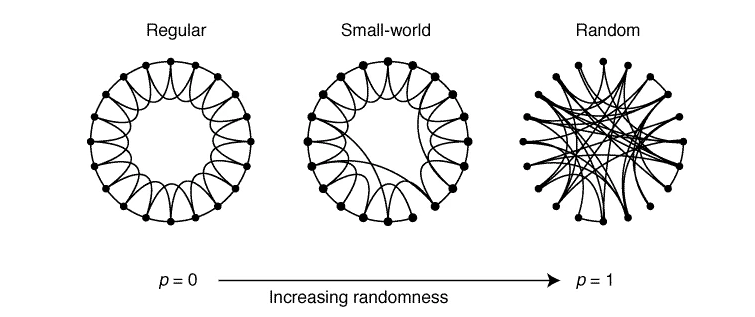

Watts-Strogatz model with $n=20$ and $k=4$ (Watts 1998).

Along with the relationship between $L$ and $N$, the clustering of a Watts-Strogatz graph is shown in the paper to follow the relationship:

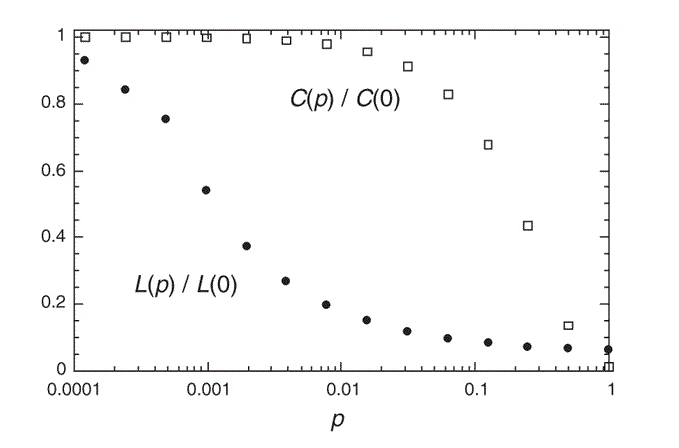

Where $L$ is the number of edges in the shortest path between two vertices, averaged over all pairs of vertices, and $C(p)$ is the clustering coefficient defined in their paper. 

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [366]:
n = 20
k = 4
p = 0.5

I initially tried an offlattice approach. This did not work the entire way (see below), but can still be initially used in creating a circulant graph.

In [367]:
# offlattice implementation
nodes = np.arange(n) # numbered nodes
nnc = np.repeat(k,n) # number of connections each node has (k)
cons = np.empty(k*n) # the connected nodes of each node, indexed such that node n is given by n*k:n*k+k
cindx = np.arange(0,k*n, k) # index in cons of the connections for node n

In [368]:
for node in nodes:
    nns = []
    
    for nn in range(1,int(k/2+1)):
        nns.append((node+nn)%n)
        nns.append((node-nn)%n)
        if k%2 == 1: # odd k
            nns.append((node+nn+1)%n)

    cons[node*k:node*k+k] = nns

Text(0.5, 1.05, 'Circulant graph with $n=20$ and $k=4$')

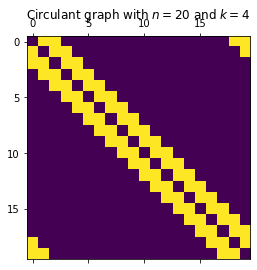

In [369]:
nnMat = np.zeros((n,n))

for node in nodes:
    for con in cons[node*k:node*k+k]:
        nnMat[node,int(con)] = 1
        nnMat[int(con),node] = 1
plt.matshow(nnMat)
plt.title("Circulant graph with $n="+ str(n)+"$ and $k="+str(k)+"$")

Text(0.5, 1.0, 'Circulant graph plotted on a circle, note nearest neighbour connections')

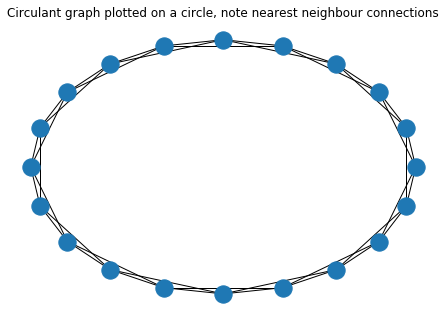

In [372]:
nnG = nx.from_numpy_matrix(nnMat)
nx.draw_circular(nnG)
plt.title("Circulant graph plotted on a circle, note nearest neighbour connections")

In [373]:
# Edge (Link) swapping is done by examining edges rather than nodes 
# Here I take only the undirected edges to ensure compatibility with NetworkX
# This method corrects for the directed/undirected errors that may arise (see below)
edges = []
for node in nodes:
    currentCons = cons[node*k:node*k+k]
    for con in currentCons:
        if [con,node] not in edges:
            edges.append([int(node),int(con)])

In [376]:
# list of all undirected edges
print("Number of undirected edges: ", len(edges))
print(edges)

Number of undirected edges:  40
[[0, 1], [0, 19], [0, 2], [0, 18], [1, 2], [1, 3], [1, 19], [2, 3], [2, 4], [3, 4], [3, 5], [4, 5], [4, 6], [5, 6], [5, 7], [6, 7], [6, 8], [7, 8], [7, 9], [8, 9], [8, 10], [9, 10], [9, 11], [10, 11], [10, 12], [11, 12], [11, 13], [12, 13], [12, 14], [13, 14], [13, 15], [14, 15], [14, 16], [15, 16], [15, 17], [16, 17], [16, 18], [17, 18], [17, 19], [18, 19]]


In [377]:
# if edge is swapped, it is replaced by a new connection between two random unique nodes
# No self connections, no duplicate connections
for i, edge in enumerate(edges):
    if np.random.rand() < p:
        new = False
        while new == False:
            newEdge = np.random.choice(nodes,2, replace=False).tolist()
            if newEdge not in edges:
                new = True
        edges[i] = newEdge

In [378]:
# list of all undirected edges is preserved as per the WS paper
print("Number of undirected edges: ", len(edges))
print(edges)

Number of undirected edges:  40
[[0, 1], [3, 16], [0, 2], [12, 5], [1, 2], [1, 3], [1, 19], [7, 17], [2, 4], [5, 3], [16, 3], [4, 5], [15, 11], [5, 6], [5, 7], [16, 0], [6, 8], [18, 0], [7, 9], [8, 9], [19, 13], [9, 10], [1, 6], [1, 9], [5, 17], [11, 12], [14, 8], [12, 13], [12, 14], [4, 14], [13, 15], [14, 15], [14, 16], [13, 9], [15, 13], [16, 17], [19, 3], [18, 3], [17, 19], [9, 12]]


In [379]:
# Convert to an adjacancy matrix for visualization
swGmat = np.zeros((n,n))

for edge in edges:
    a = edge[0]
    b = edge[1]
    swGmat[a,b] = 1
    swGmat[b,a] = 1

Text(0.5, 1.05, 'Circulant graph after link-swapping as per WS \n $n=20, k=4, p=0.5$')

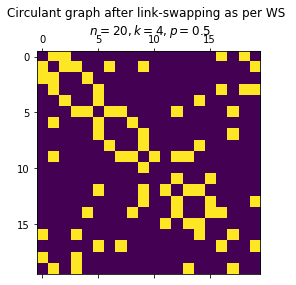

In [382]:
plt.matshow(swGmat)
plt.title("Circulant graph after link-swapping as per WS \n $n="+ str(n)+", k="+str(k)+", p="+str(p)+"$")

DegreeView({0: 4, 1: 6, 2: 3, 3: 5, 4: 3, 5: 6, 6: 3, 7: 3, 8: 3, 9: 6, 10: 1, 11: 2, 12: 5, 13: 4, 14: 5, 15: 3, 16: 4, 17: 4, 18: 2, 19: 4})

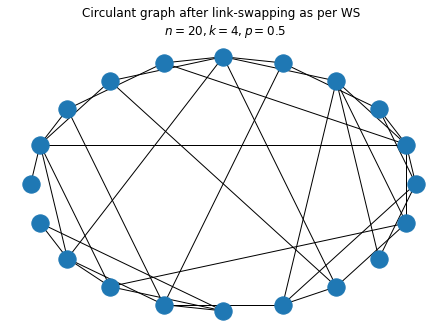

In [383]:
swG = nx.from_numpy_matrix(swGmat)
nx.draw_circular(swG)
plt.title("Circulant graph after link-swapping as per WS \n $n="+ str(n)+", k="+str(k)+", p="+str(p)+"$")
swG.degree()

#### The WS algorithm is now complete and will be used for efficiency optimization
The remaining visualization and analysis will be done with networkx and not included in the algorithm efficiency.

Compare to networkx algorithm

[(0, 3), (1, 4), (2, 2), (3, 3), (4, 3), (5, 3), (6, 6), (7, 5), (8, 6), (9, 3), (10, 3), (11, 3), (12, 7), (13, 7), (14, 3), (15, 4), (16, 4), (17, 3), (18, 4), (19, 4)]


Text(0.5, 1.0, 'WS graph via networkx \n $n=2000, k=4, p=0.5$')

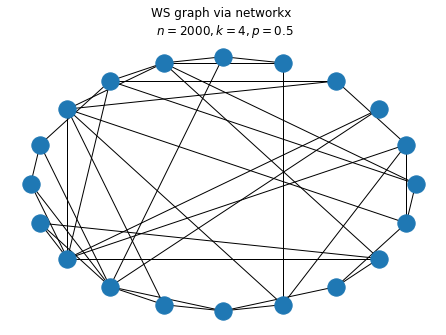

In [471]:
G = nx.watts_strogatz_graph(20,4,0.5)
nx.draw_circular(G)
print(G.degree())
plt.title("WS graph via networkx \n $n="+ str(n)+", k="+str(k)+", p="+str(p)+"$")

## Previous attempt: directed vs undirected troubles
The off lattice method I originally planned on implementing gave troubles as it produced directed graphs rather than the intended undirected graphs. As I swapped edges, I did not remove the edge directed in the opposite direction, meaning an originally undirected edge splits into 2 different directed edges. This lead to an overall increase in the number of edges. Eventually, when converting to an undirected graph, the overall degree and number of edges would be much higher than intended, which is not the result in the WS paper. Although this could have been successfully implemented through further matrix manipulations, it would have been much slower than the successful method implemented above. As such, I called it quits.

Interestingly, the results of this section are more similar to a Newmann-Watts-Strogatz (NWS) graph rather than a Watts-Strogatz. The NWS graph employs a similar method of probabilistically adding edges between random nodes. However, it does not replace any pre-existing edges, rather it adds this long range edge as a new edge, thus increasing the overall degree and number of edges in the graph.

In [348]:
nodes = np.arange(n)
nnc = np.repeat(k,n)
cons = np.empty(k*n)
cindx = np.arange(0,k*n, k)

for node in nodes:
    nns = []
    
    for nn in range(1,int(k/2+1)):
        nns.append((node+nn)%n)
        nns.append((node-nn)%n)
        if k%2 == 1:
            nns.append((node+nn+1)%n)

    cons[node*k:node*k+k] = nns

In [349]:
# Previous attempt
for i, con in enumerate(cons):
    node = int(np.floor(i/k))
    possibleCons = nodes[nodes != node]
    currentCons = cons[node*k:node*k+k]
#     print("Node : ", node, ", Connection: ", con)
#     print(currentCons)
    for pop in currentCons:
        possibleCons = possibleCons[possibleCons != pop]
#     print(possibleCons)

    assert np.any(np.isin(currentCons,possibleCons)) == False

    
    if np.random.rand() < p:
        newCon = np.random.choice(possibleCons)
        cons[i] = newCon
        
        # undirected connection
#         cons[newCon*k] = node
        assert con != cons[i]

#     assert len(np.unique(cons[node*k:node*k+k])) == k

In [360]:
swMat = np.zeros((n,n))

for node in nodes:
    for con in cons[node*k:node*k+k]:
        swMat[node,int(con)] = 1
        swMat[int(con),node] = 1

Text(0.5, 1.05, 'Undirected adjacancy matrix of off-lattice method')

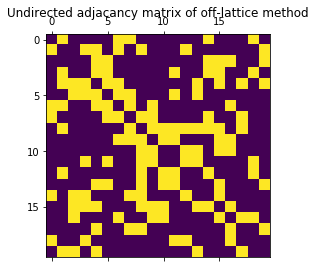

In [361]:
plt.matshow(swMat)
plt.title("Undirected adjacancy matrix of off-lattice method")

As noted, this is where the algorithm breaks down and the total number of edges increases. When converting to a networkx graph, all edges become undirected edges and the degree of each node increases past the expected point.

In [362]:
np.sum(swMat, axis=0)

array([ 5.,  7.,  6.,  7.,  9.,  7.,  7.,  7., 10.,  7.,  6.,  7.,  6.,
        7.,  7.,  9.,  7.,  5.,  5.,  5.])

DegreeView({0: 5, 1: 7, 2: 6, 3: 7, 4: 9, 5: 7, 6: 7, 7: 7, 8: 10, 9: 7, 10: 6, 11: 7, 12: 6, 13: 7, 14: 7, 15: 9, 16: 7, 17: 5, 18: 5, 19: 5})

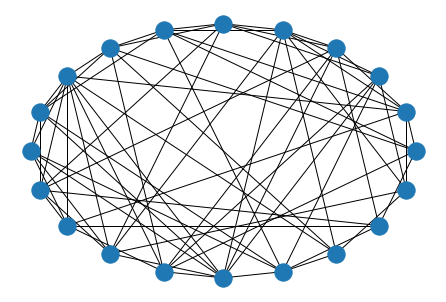

In [363]:
swG = nx.from_numpy_matrix(swMat)
nx.draw_circular(swG)
swG.degree()

Although wrong, this network type is slightly similar to the NWS graph.

DegreeView({0: 8, 1: 7, 2: 6, 3: 5, 4: 6, 5: 6, 6: 8, 7: 7, 8: 7, 9: 5, 10: 8, 11: 5, 12: 7, 13: 4, 14: 6, 15: 6, 16: 6, 17: 8, 18: 6, 19: 5})

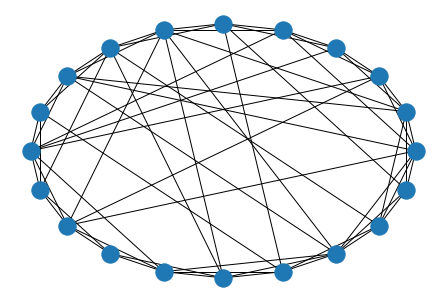

In [364]:
G = nx.newman_watts_strogatz_graph(20,4,0.5)
nx.draw_circular(G)
G.degree()

## Checking small-world properties
First, wrap up algorithm in a function. At a glance, it can already be seen there is room for improvemnt. First, lets check the small-world properties of path length $L$ and clustering $C$

In [387]:
def WattsStrogatz(n,k,p, plot=False):
    """
    Watts Strogatz small world network algorithm
    Follows successful implementation seen above
    """
    nodes = np.arange(n) # numbered nodes
    cons = np.empty(k*n) # the connected nodes of each node, indexed such that node n is given by n*k:n*k+k
    
    # create circulant graph with nearest neighbour connections
    for node in nodes:
        nns = []
        for nn in range(1,int(k/2+1)):
            nns.append((node+nn)%n)
            nns.append((node-nn)%n)
            if k%2 == 1: # odd k
                nns.append((node+nn+1)%n)

        cons[node*k:node*k+k] = nns
        
    # create edge list
    edges = []
    for node in nodes:
        currentCons = cons[node*k:node*k+k]
        for con in currentCons:
            if [con,node] not in edges:
                edges.append([int(node),int(con)])
                
    # replace edges with small world edges
    for i, edge in enumerate(edges):
        if np.random.rand() < p:
            new = False
            while new == False:
                newEdge = np.random.choice(nodes,2, replace=False).tolist()
                if newEdge not in edges:
                    new = True
            edges[i] = newEdge
    
    # convert to adjacancy matrix
    swGmat = np.zeros((n,n))
    for edge in edges:
        a = edge[0]
        b = edge[1]
        swGmat[a,b] = 1
        swGmat[b,a] = 1
    
    # convert to networkx graph
    swG = nx.from_numpy_matrix(swGmat)
    if plot:
        nx.draw_circular(swG)
        plt.title("Circulant graph after link-swapping as per WS \n $n="+ str(n)+", k="+str(k)+", p="+str(p)+"$")
        plt.show()
        
    return(swG)

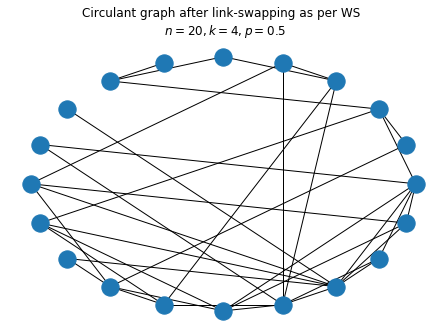

In [469]:
G = WattsStrogatz(20,4,0.5,True)

In [470]:
%timeit WattsStrogatz(500,10,0.5)
%timeit nx.watts_strogatz_graph(500,10,0.5)

881 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.24 ms ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Small world networks can described by the distance $L$ between any two random nodes grows proportionally to the logarithm of the number of nodes $N$.

$$ L \propto logN $$

To test this, I will vary network size $N$ and $p$ to see if my graph follows this small-world relationship. One thing to note is that the WS algorithm can lead to disconnected components (two distinct graphs) which breaks the definition of $L$. While there are algorithms to circumvent this (not allowing disconnected components in a modified WS graph), I will rather fix parameters to prevent disconnected components. 

Average shortest path length will be found using networkx which gives

$$ L =\sum_{s,t \in V} \frac{d(s, t)}{n(n-1)} $$

where $V$ is the set of nodes in $G$, $d(s,t)$ is the shortest path from nodes $s$ to $t$, and $n$ is the number of nodes in $G$.

In [412]:
help(nx.average_shortest_path_length)

Help on function average_shortest_path_length in module networkx.algorithms.shortest_paths.generic:

average_shortest_path_length(G, weight=None, method=None)
    Returns the average shortest path length.
    
    The average shortest path length is
    
    .. math::
    
       a =\sum_{s,t \in V} \frac{d(s, t)}{n(n-1)}
    
    where `V` is the set of nodes in `G`,
    `d(s, t)` is the shortest path from `s` to `t`,
    and `n` is the number of nodes in `G`.
    
    Parameters
    ----------
    G : NetworkX graph
    
    weight : None or string, optional (default = None)
       If None, every edge has weight/distance/cost 1.
       If a string, use this edge attribute as the edge weight.
       Any edge attribute not present defaults to 1.
    
    method : string, optional (default = 'unweighted' or 'djikstra')
        The algorithm to use to compute the path lengths.
        Supported options are 'unweighted', 'dijkstra', 'bellman-ford',
        'floyd-warshall' and 'floyd-wars

In [423]:
print(r"n = 20, k = 4, p = 0.5")
print("L =",nx.average_shortest_path_length(G))

n = 20, k = 4, p = 0.5
L = 2.194736842105263


In [460]:
sizes = [20,50,100,250,500,750,1000,2000]

Ls = []
for n in sizes:
    ls = 0
    for i in range(3):
        G = WattsStrogatz(n,10,0.1)
        L = nx.average_shortest_path_length(G)
        ls += L
    Ls.append(ls/3)    

In [461]:
L2s = []

for n in sizes:
    ls = 0
    for i in range(3):
        G = WattsStrogatz(n,10,0.2)
        L = nx.average_shortest_path_length(G)
        ls += L
    L2s.append(ls/3)

In [462]:
L3s = []

for n in sizes:
    ls = 0
    for i in range(3):
        G = WattsStrogatz(n,8,0.1)
        L = nx.average_shortest_path_length(G)
        ls += L
    L3s.append(ls/3)

In [463]:
L4s = []

for n in sizes:
    ls = 0
    for i in range(3):
        G = WattsStrogatz(n,10,0.05)
        L = nx.average_shortest_path_length(G)
        ls += L
    L4s.append(ls/3)

In [464]:
L5s = []

for n in sizes:
    ls = 0
    for i in range(3):
        G = WattsStrogatz(n,12,0.1)
        L = nx.average_shortest_path_length(G)
        ls += L
    L5s.append(ls/3)

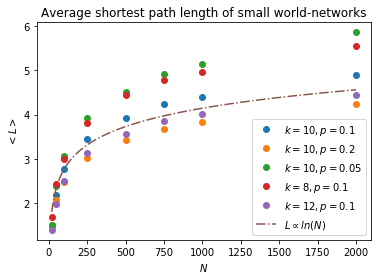

In [467]:
x = np.arange(20,2000)
plt.plot(sizes, Ls, 'o', label="$k=10, p = 0.1$")
plt.plot(sizes, L2s, 'o', label="$k=10, p = 0.2$")
plt.plot(sizes, L4s, 'o', label="$k=10, p = 0.05$")
plt.plot(sizes, L3s, 'o', label="$k=8, p = 0.1$")
plt.plot(sizes, L5s, 'o', label="$k=12, p = 0.1$")
plt.plot(x,0.6*np.log(x), '-.',label="$L \propto ln(N)$")
plt.legend()
plt.title("Average shortest path length of small world-networks")
plt.xlabel("$N$")
plt.ylabel("$<L>$")
plt.show()

Each $<L>$ value was taken as an average of 3 random network generations. All WS networks scale with $L \propto logN$. While different parameters $(k,p)$ change the shape of the curve, the proportionality remains. You can see that more connections (larger $k$) and greater rewiring probabilities (larger $p$) gives more "small-world" effect as larger networks (larger $N$) gives lower $<L>$ values.

Next step in verifying the network would be comparing to Watts and Strogatz's results.

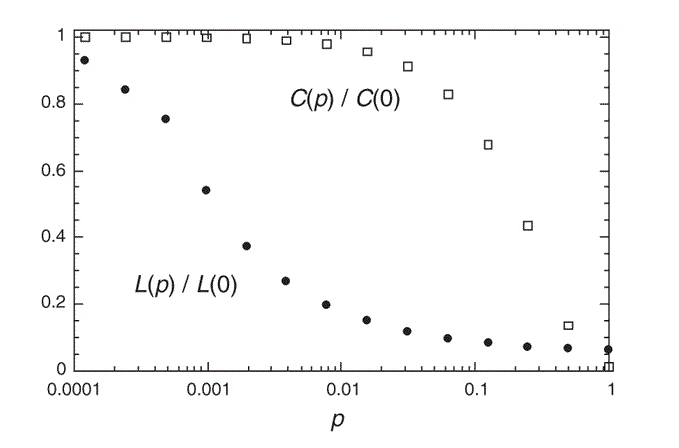

Path lengths will be determined similarly to before. Clustering coefficient will be determined using networkx. For unweighted graphs such as these, the clustering coefficient $c_u$ of a node $u$ is the fraction of possible triangles through that node that exist.

$$ c_u = \frac{2T(u)}{deg(u)(deg(u)-1)} $$

where $T(u)$ is the number of triangles with node $u$ and $deg(u)$ is the degree of $u$. Networkx can give the average clustering coefficient of a graph

$$ C = \frac{1}{n}\sum_{v \in G} c_v $$

where $c_v$ is the clustering of a node $v$.

In [468]:
help(nx.average_clustering)

Help on function average_clustering in module networkx.algorithms.cluster:

average_clustering(G, nodes=None, weight=None, count_zeros=True)
    Compute the average clustering coefficient for the graph G.
    
    The clustering coefficient for the graph is the average,
    
    .. math::
    
       C = \frac{1}{n}\sum_{v \in G} c_v,
    
    where :math:`n` is the number of nodes in `G`.
    
    Parameters
    ----------
    G : graph
    
    nodes : container of nodes, optional (default=all nodes in G)
       Compute average clustering for nodes in this container.
    
    weight : string or None, optional (default=None)
       The edge attribute that holds the numerical value used as a weight.
       If None, then each edge has weight 1.
    
    count_zeros : bool
       If False include only the nodes with nonzero clustering in the average.
    
    Returns
    -------
    avg : float
       Average clustering
    
    Examples
    --------
    >>> G = nx.complete_graph(5)
    

# Barabasi-Albert (Power law network)

Power law networks refer to networks with degree distributions that follow power laws. 

$$P(k) \propto k^{-\gamma} $$

Where $k$ is the node degree, $P(k)$ is the probability of that node degree, and $\gamma$ is a power law exponenet ($\gamma =3$ in BA model). 

BA model follows a "rich gets richer" algorithm. With an initial system of connected nodes, new nodes are added with a probability to connect with each node $i$ given by 

$$p_i = \frac{k_i}{\Sigma_j k_j} $$

Where $k_i$ is the degree of node $i$ and the denominator is the total degree in the entire system. As such, "rich" hubs in the network with higher degrees will accumulate more connections quicker than less connected hubs.

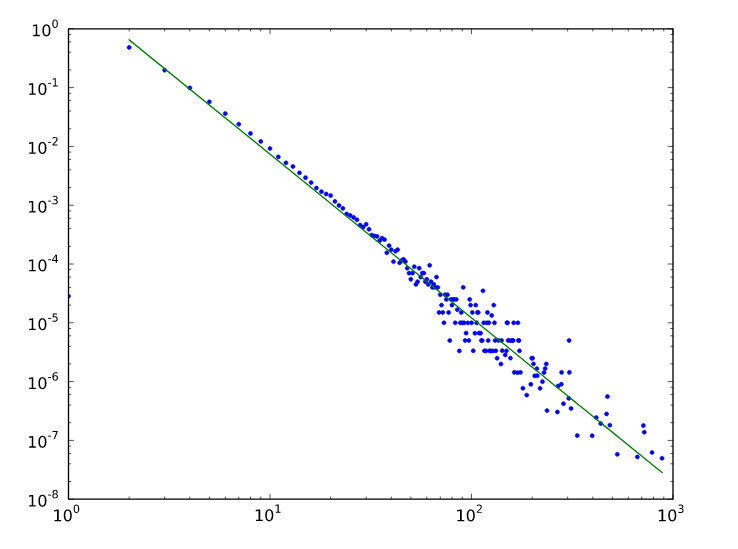

$P(k)$ vs $k$ plot shows a power law distribution. (Wikipedia)

Clustering is not a hallmark of the Barabasi-Albert graph, instead there should be a lack thereof. To identify a correct power law graph, a power law degree distribution is most important.

# Holme-Kim (Power law cluster graph)

Combines WS and BA network models for a power-law network with tuneable clustering exhibited in small-world networks.

It is essentially the Barabási–Albert (BA) growth model with an extra step that each random edge is followed by a chance of making an edge to one of its neighbors too (and thus a triangle).

This algorithm improves on BA in the sense that it enables a higher average clustering to be attained if desired. To identify a correct Holme-Kim graph, a power law degree distribution should be observed at all degrees of clustering. Clustering coefficient was defined in their paper and follows a relationship given by:

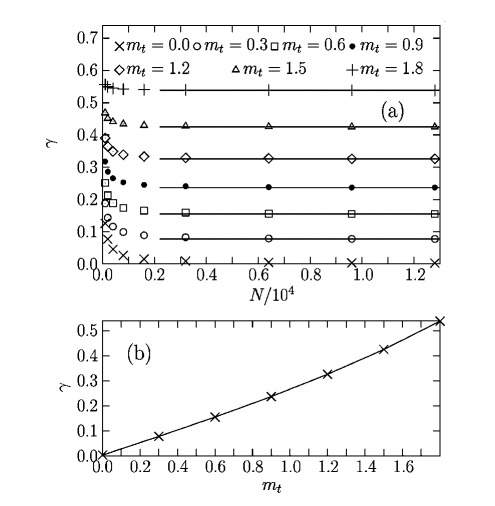

where $\gamma$ is the clustering coefficient, $N$ is network size, and $m_t$ is the average number of triads( triangle) per time step as defined in their paper. Notice how the clustering reaches a constant value as network size increases, thus allowing for tuneable clustering similar to the figure in the WS paper.